interactive(children=(Dropdown(description='Field', options=('boop',), value='boop'), FloatSlider(value=1.0, d…

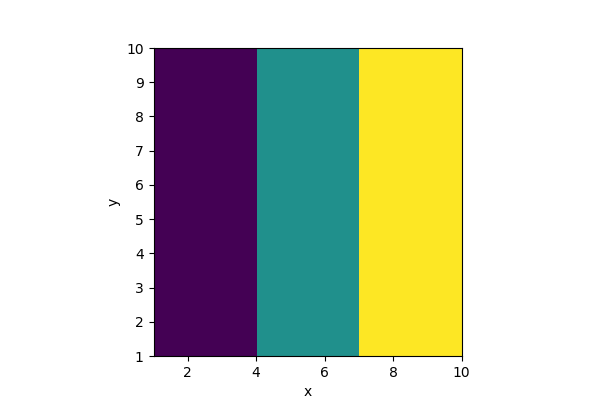

In [ ]:
import FD as FD

import importlib
importlib.reload(FD)
%matplotlib widget

import numpy as np

try:
    m = FD.Model(3)
except Exception as e:
    print(e)


c:\Users\Ephraim\GitHub\FiniteDiff\src\FiniteDiff\FD.py:526: Warning: Overriding values
  warnings.warn("Overriding values", category=Warning)


interactive(children=(Dropdown(description='Field', options=('position', 'slope', 'moment', 'shear'), value='p…

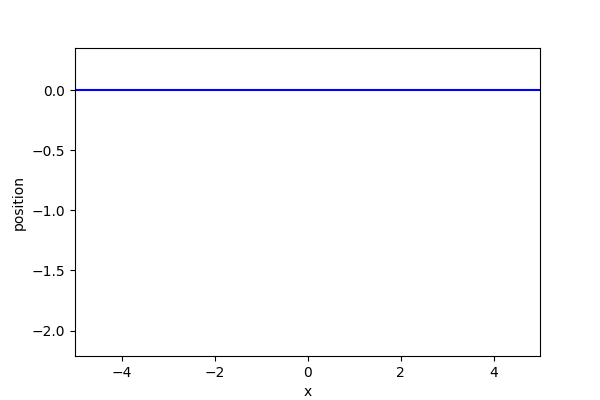

In [3]:
import numpy as np
import FD
m = FD.Model({"x":np.linspace(-5,5,101),"t":np.linspace(1,10,101)},time_axis="t")
%matplotlib widget
y = FD.Field(m,"position",n_time_ders=2)
s = FD.Field(m,"slope",edge_axes = ["x"])
M = FD.Field(m,"moment")
V = FD.Field(m,"shear",edge_axes = ["x"])


y.set_BC("0","x","start")
s.set_BC("0","x","start")
M.set_BC("0","x","end")
V.set_BC("-5","x","end")

y.set_IC("0")
y.dot.set_IC("0")

E = 1
I = 1
lin_dense = 100

e_c = FD.Stencil([-1/2,1/2],1,axis_type="edge",der_axis_type="cell")

c_e = FD.Stencil([-1/2,1/2],1,axis_type="cell",der_axis_type="edge")


while not m.finished:
  
  dydx = c_e.der(y.prev,"x")

  s.assign_update(dydx)

  dsdx = e_c.der(s.new,"x")

  M.assign_update(E*I*dsdx)

  dMdx = c_e.der(M.new,"x")

  V.assign_update(dMdx)

  dVdx = e_c.der(V.new,"x")

  a = dVdx/lin_dense

  y.dot.dot.assign_update(a)

  y.dot.time_integrate_update()

  y.time_integrate_update()


  m.increment_time()

m.interact()

Finite approximation: f'' = [f(x-h) - 2f(x+0h) + f(x+h)] / [h^2]

Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]

Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]

Boundary conditions and initial conditions may be in conflict for field boop
Conflicting values override and become equal to whatever was assigned last

All initial conditions set!

CFL: 0.454, must be under 0.5 for stability



interactive(children=(Dropdown(description='Field', options=('flux', 'boop', 'boop dot'), value='flux'), Float…

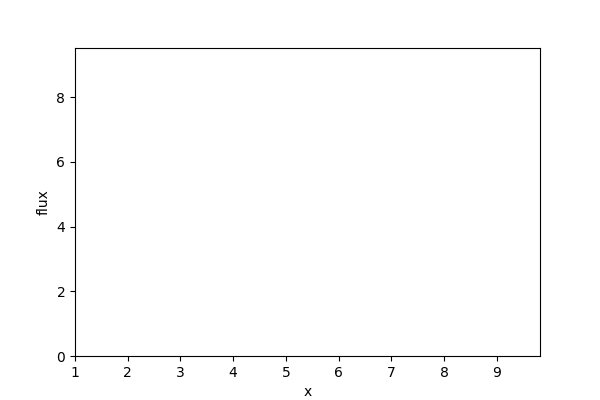

In [3]:
import FD as FD
import numpy as np
import importlib
importlib.reload(FD)
%matplotlib widget

k = 2
dx = 0.21
dt = 0.01

m = FD.Model({"x":np.arange(1,10,dx),"t":np.arange(0,10,dt)},"t")#,periodic=["x"])


d2 = FD.Stencil([-1,0,1],der_order=2)

c_e = FD.Stencil([-1/2,1/2],der_order=1,axis_type="cell",der_axis_type="edge")
e_c = FD.Stencil([-1/2,1/2],der_order=1,axis_type="edge",der_axis_type="cell")

f = FD.Field(m,"boop",n_time_ders = 1)
f.set_IC("1")
f.set_BC("0","x","start")
#f.set_BC("0","x","end")

Tflux = FD.Field(m,"flux",n_time_ders = 0,edge_axes="x")
Tflux.set_BC("1","x","end")

m.check_IC()

CFL = k*dt/dx**2

print(f"CFL: {round(CFL,3)}, must be under 0.5 for stability\n")

while not m.finished:

    Tx = k * c_e.der(f.prev,"x")

    Tflux.assign_update(Tx)

    Tp = e_c.der(Tflux.new,"x")

    f.dot.assign_update(Tp)

    f.time_integrate_update()


    m.increment_time()

m.interact()

Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]

Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]

Boundary conditions and initial conditions may be in conflict for field Temperature
Conflicting values override and become equal to whatever was assigned last

CFL: 0.454, must be under 0.5 for stability

All initial conditions set!



interactive(children=(Dropdown(description='Field', options=('Temperature Flux', 'Temperature', 'Temperature d…

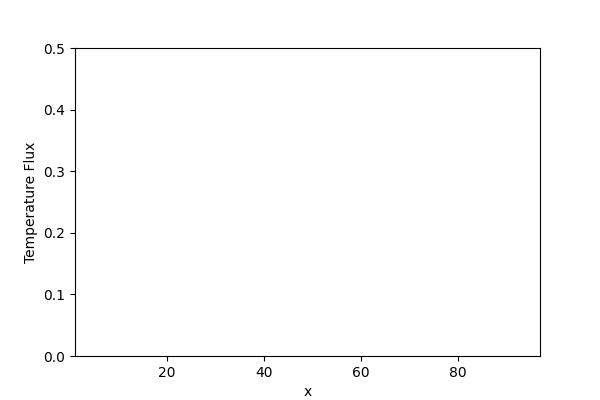

In [10]:
%matplotlib widget
m = FD.Model({"x": range(1,100,4), "t": range(1,1000)}, time_axis = "t")

T = FD.Field(m, "Temperature", n_time_ders = 1)
Tflux = FD.Field(m, "Temperature Flux", n_time_ders = 0, edge_axes = "x")

cell_to_edge = FD.Stencil([-1/2,1/2],der_order=1,axis_type="cell",der_axis_type="edge")
edge_to_cell = FD.Stencil([-1/2,1/2],der_order=1,axis_type="edge",der_axis_type="cell")

T.set_IC("1")
T.set_BC("0","x","start")
Tflux.set_BC("0","x","end")

k = 2 # thermal conductivity

CFL = k*dt/dx**2

print(f"CFL: {round(CFL,3)}, must be under 0.5 for stability\n")


m.check_IC() # not required, but recommended: check's if all necessary initial conditions have been set up
while not m.finished:

    dTdx = cell_to_edge.der(T.prev,"x")

    Tflux.assign_update(k * dTdx)

    Tp = edge_to_cell.der(Tflux.new,"x")

    T.dot.assign_update(Tp)

    T.time_integrate_update()

    m.increment_time()

m.interact() # creates an interactive visual in a jupyter notebook

# get numpy arrays of the temperature and temperature flux:
#Tflux.data
#T.data   